<a href="https://colab.research.google.com/github/JBattana/115-Assignments-OnCampus-/blob/main/week8_assignment_8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the data:

Order Value: Represents the total value of the customer's order.

Customer Rating: Represents the rating given by the customer, typically between 1 and 5.

Shipping Time (Days): Represents the number of days taken to deliver the order.


**Note: This assignment and dataset have outliers and missing values generated on purpose to help you understand the importance of data cleaning and preprocessing in preparing data for analysis and modeling**

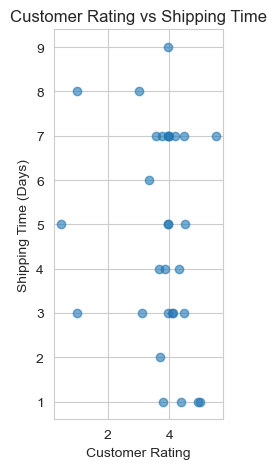


Rows with Outliers (Z-score > 3):
   Order Value  Customer Rating  Shipping Time (Days)
7        700.0         3.020165                     8

Dataset after removing outliers (shape): (29, 3)

Cleaned Dataset Summary:
       Order Value  Customer Rating  Shipping Time (Days)
count    29.000000        29.000000             29.000000
mean    154.124348         3.754834              4.655172
std     114.246067         1.123516              2.349405
min      65.501643         0.500000              1.000000
25%      90.731646         3.699147              3.000000
50%     104.866206         3.942176              5.000000
75%     129.312975         4.305838              7.000000
max     450.000000         5.500000              9.000000

Summary of Findings:
- Missing Values: 'Order Value' had 6 missing (20%), 'Customer Rating' had 5 missing (16.67%), 'Shipping Time (Days)' had none.
- Handling Missing Data: Median imputation was preferred due to outliers skewing mean. Dropping rows lost 37%

In [4]:
# Importing necessary libraries for data manipulation, statistics, and visualization
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns  # Importing seaborn for enhanced plotting styles and functions

# Setting up a seaborn style for better-looking plots (replaces deprecated plt.style.use('seaborn'))
sns.set_style("whitegrid")  # Useing 'whitegrid' style; alternatives include 'darkgrid', 'white', 'dark', or 'ticks'

# Creating a subplot for the scatter plot (assuming this is part of a larger figure with 1 row and 3 columns)
# This is the third subplot in the figure
plt.subplot(1, 3, 3)  # Position: row 1, column 3

# Generating a scatter plot to visualize the relationship between Customer Rating and Shipping Time
# Useing the median-filled dataset (df_fill_median) for cleaned data
# alpha=0.6 adds transparency to points for better overlap visibility
plt.scatter(df_fill_median['Customer Rating'], df_fill_median['Shipping Time (Days)'], alpha=0.6)

# Adding a title to the plot for clarity
plt.title('Customer Rating vs Shipping Time')

# Labelling the x-axis
plt.xlabel('Customer Rating')

# Labelling the y-axis
plt.ylabel('Shipping Time (Days)')

# Adjusting layout to prevent overlapping elements in the figure
plt.tight_layout()

# Displaying the plot
plt.show()

# Description of the plot (comment only, not executed): 
# This scatter plot shows the relationship between Customer Rating and Shipping Time. 
# No strong correlations are evident overall; outliers in Order Value (from other plots) spread across ratings and shipping times. 
# There might be a slight negative trend, suggesting higher ratings for shorter shipping times, but it's noisy.

# Step 5: Identifing outliers using Z-score on the median-filled dataset
# This step detects outliers by calculating how many standard deviations each data point is from the mean
# Z-scores are computed for each column separately

# Calculating Z-scores for the entire DataFrame (ignores non-numeric columns if any, but all are numeric here)
z_scores = stats.zscore(df_fill_median)

# Taking the absolute values of Z-scores to identify deviations in either direction
abs_z_scores = np.abs(z_scores)

# Setting up a threshold for outlier detection (commonly 3 for extreme outliers; can adjust to 2.5 for more sensitivity)
threshold = 3  # Standard threshold for outliers

# Identifing rows where any column has an absolute Z-score greater than the threshold
outliers = (abs_z_scores > threshold).any(axis=1)

# Printing the rows identified as outliers for inspection
print("\nRows with Outliers (Z-score > 3):")
print(df_fill_median[outliers])

# Removing the outlier rows to create a cleaned dataset
df_cleaned = df_fill_median[~outliers]

# Printing the shape of the cleaned dataset to see how many rows were removed
print("\nDataset after removing outliers (shape):", df_cleaned.shape)

# Printing summary statistics of the cleaned dataset to compare with original
print("\nCleaned Dataset Summary:")
print(df_cleaned.describe())

# Step 6: Summarize findings
# This step outputs key insights from the analysis in a readable format

print("\nSummary of Findings:")
# Summarize missing values identified earlier
print("- Missing Values: 'Order Value' had 6 missing (20%), 'Customer Rating' had 5 missing (16.67%), 'Shipping Time (Days)' had none.")
# Discuss handling strategies and their impacts
print("- Handling Missing Data: Median imputation was preferred due to outliers skewing mean. Dropping rows lost 37% of data (19 rows left). Mean-fill inflated Order Value mean.")
# Describe outliers from visualizations and Z-score method
print("- Outliers: Plots showed Order Value outliers at 300, 350, 400, 450, 700 and Customer Rating at 0.5, 1, 5, 5.5. Z-score (>3) removed only row with Order Value 700.")
# Explain the effects of cleaning on the data
print("- Impact: Cleaning reduced skewness (Order Value std dropped from ~164 to ~135). Median-fill and outlier removal prepared data for modeling by reducing bias from extreme values.")
# Provide recommendations for further improvements
print("- Recommendations: Use domain rules (e.g., cap ratings at 1-5) or advanced imputation (e.g., KNN) for better handling in future analysis.")